In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn. metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.externals import joblib
%matplotlib inline

#custom functions
def NSC(y_pred,y_true):
    """
    Nash-Sutcliffe Coefficient
    """
    return 1 - sum((y_pred-y_true)**2)/sum((y_true-np.mean(y_true))**2)

def corr(data1, data2):
    "data1 & data2 should be numpy arrays."
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()

#     corr = ((data1-mean1)*(data2-mean2)).mean()/(std1*std2)
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
#Load dataframes
dir_data = '../data/Features/'

Potohar_HR_Features = pd.read_excel(dir_data + 'Potohar_HR_Features.xlsx')
Potohar_HR_Features = Potohar_HR_Features.fillna(0)
Potohar_HR_Features.name ='Potohar_HR_Features'


In [3]:
#Make a dataframe of step models first____ features
Features_SF = ['WK_14_Minweekly_C','WK_15_Meanweekly_SM_0_10cm', 'JanandMar_below8mmhr', 
                 'MinMonth_Season_STemp_0_10cm']

Features_RF = ['WK_14_Minweekly_SM_0_10cm','WK_15_Minweekly_SM_0_10cm','WK_16_Minweekly_SM_0_10cm',
                  'WK_13_Maxweekly_SM_0_10cm', 'WK_14_weekly_STemp_Hrsabove_10C','WK_24_weekly_STemp_Hrsabove_10C',
                  'WK_16_weekly_STemp_Hrsabove_10C', 'Feb_Minmonthly_SM_0_10cm','Jan_Maxmonthly_SM_10_40cm',
                  'MaxMonth_Season_Precip_mm','Season_Summonthly_Precip_mm']
                
#Take top features from categories top performing models
Features_MARS = ['WK_11_Minweekly_C','WK_14_Minweekly_C','WK_15_Minweekly_C',
                   'WK_10_Maxweekly_C','WK_23_Maxweekly_C','MaxMonth_Season_Precip_mm',
                   'Feb_Meanmonthly_SM_0_10cm','WK_23_Minweekly_STemp_0_10cm']

In [4]:
#Combined Season Weekly and Monthly data
Features={
    'Features_SF':Features_SF, 
'Features_RF':Features_RF,
'Features_MARS':Features_MARS ,
}


features =[
     'Features_SF', 'Features_RF','Features_MARS' 
]

In [5]:
  #Model classification as a function of target and data input
#This model designated to work only with Potohar Wheat Features!!!!!!!!!!!!!!!
def Direct_Out(features): 
    global dir_out
    global directory
    directory = '../output/Final/RFR'
    
    if features == Features_SF:
        dir_out = directory + '/Features_SF/'    
    elif features == Features_RF:
        dir_out = directory + '/Features_RF/'
    elif features ==Features_MARS:
        dir_out = directory + '/Features_MARS/'
   
        
    return (dir_out)


In [6]:
#make a model function to determine best parameters
#Xt, yt are training features, training targets
def fit_model(X_train, y_train):
  
  #model dictionary and hyper-params to search over
    model = {}
    model['RandomForestRegressor'] = [RandomForestRegressor(), {'n_estimators':np.arange(500,4000,200),
                                                                'criterion' : ['mse'],
                                                                'max_depth':np.arange(5,65,5),
                                                                'max_features': [0.25, 0.5, 0.75],
                                                                'bootstrap':['True'],
                                                                'oob_score':['False'],
                                                                'random_state':[42],
                                                                'n_jobs': [-1]
                                                                   }] 
  #Loop over models, hyper-params, and tune with cross validation                                                               
    for i in model.keys():
        clf = GridSearchCV(model[i][0], model[i][1], n_jobs = -1, cv = 5)
        GS = clf.fit(X_train,y_train)
        model[i].append(GS)
        clf_b = model[i][2].best_estimator_
  
    return clf_b

In [7]:
#create a dataframe to display the Statistics of model
Model_ResultsRFMonthlyFinalTop = pd.DataFrame()


#create a dataframe to display the Statistics of model
def stats(data,features,target, y_test, y_pred):
    Accuracy = pd.DataFrame()
    Accuracy['Dataframe'] = [data]
    Accuracy['Feature'] = [j] #This is set up to put correct feature name while using for loop model runs
    Accuracy['Target'] = [target]
    Accuracy['mean_absolute_error'] = [mean_absolute_error(y_test, y_pred)]
    Accuracy['RMSE'] = [np.sqrt(mean_squared_error(y_test, y_pred))] # compute the RMSE of predictions
    Accuracy['r^2'] = [r2_score(y_test, y_pred)]
    Accuracy['NS'] = [NSC(y_pred,y_test)]
    Accuracy['MSE'] = [mean_squared_error(y_test, y_pred)]
    Accuracy['MAPE']= [mean_absolute_percentage_error(y_test, y_pred)]
    Accuracy['Correlation'] = [corr(y_pred, y_test)]
    return Accuracy

In [8]:
#Model classification as a function of target and data input
#This model designated to work only with Potohar Wheat Features!!!!!!!!!!!!!!!
def RFR_PM_HR_Norm_model(target, features, data):
    
    global dir_out
    global directory
    global Model_ResultsRFMonthlyFinalTop
    directory = '../output/Final/RFR'
    Resultsdirectory = '../output/Final/RFR'
    dir_out = Direct_Out(features)
    df = data
  
    X = df[features]
    y = df[target]
  
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =42)
  
    clf_best = fit_model(X_train,y_train)
  
    print (df.name)
    print(j)
    print (target)
    print (clf_best)
    
    #predict using the best model
    y_pred = clf_best.predict(X_test)
    feature_imp = pd.DataFrame(clf_best.feature_importances_.reshape(-1, len(clf_best.feature_importances_)), 
                           columns= features)
   #Statistics
   #Statistics
    RMSE= np.sqrt(mean_squared_error(y_test, y_pred)) # compute the RMSE of predictions
    r2= r2_score(y_test, y_pred)  
    MAE =  [mean_absolute_error(y_test, y_pred)]
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    NS = NSC(y_pred,y_test)
    Cor = corr(y_pred, y_test)
    Model_ResultsRFMonthlyFinalTop = Model_ResultsRFMonthlyFinalTop.append(stats('Potohar_HR_Features',j,target, y_test, y_pred))
    Model_ResultsRFMonthlyFinalTop.to_csv(Resultsdirectory + 'Model_ResultsRF.csv')
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
  
  #print the accuracy score and feature importance
    
   # print("Accuracy is", Accuracy)
    print("RMSE is:", RMSE)
    print("R2 is:", r2)
    print("NS is", NS)
    print("Correlation is", Cor)
    print('MAPE is', MAPE)
  
  #Save to file  
    d_out = X_test.copy()
    d_out['predicted '+ target] = clf_best.predict(X_test)
    #d_out['training (yes/no)'] = 0
   # d_out['training (yes/no)'].loc[X_train.index] = 1
    d_out['y_test'] = y_test
    d_out['y_pred'] = y_pred
    
    
    Analysis = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
  
    file_var = dir_out + ' ' + dir_data[8:-1]
    
    d_out.to_csv(dir_out + 'DataWithPredictedValues.csv')
    #Accuracy.to_csv(file_var + ' Accuracy.csv')
    joblib.dump(clf_best, file_var + 'BestEstimator.pkl') 
    Analysis.to_csv(file_var + 'Analysis')
    feature_imp.to_csv(file_var + 'feature_importances.csv')
# print (classification_report(y_test, y_predict))
  #Plot the results

      #Plot the results
    r = 'R^2 = '
    c = 'R = '
    m = 'MAPE ='
    #plt.close()
    f,a = plt.subplots()
    a.plot(y_test, label = 'Test Data '+ target)
    a.plot(y_pred, label = 'Predicted '+ target)
    a.grid()
    a.title.set_text('PM_HR_Features' + target+j)
    a.set_ylabel(target)
    a.legend()
    a.annotate((r,r2), xy = (8,1), xytext = (8, 1))
    a.annotate((c,Cor), xy = (8,0.7), xytext = (8, 0.7))
    a.annotate((m,MAPE), xy = (8,0.5), xytext = (10, 0.5))
    a.set_xlim(left = 0, right = len(y_pred))
    a.set_ylim(bottom = -1, top = y_test.max()+1)
    f.set_size_inches([8,5])
   
   

C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Features_SF
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.19687061287700522
R2 is: 0.7689979297939322
NS is 0.7689979297939321
Correlation is 0.8814357723850731
MAPE is 14.818670688547408


C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Features_RF
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.20883981855095865
R2 is: 0.7400554599538796
NS is 0.7400554599538794
Correlation is 0.8381606362233043
MAPE is 12.834281861725913


C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Features_MARS
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=35,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.17850061571837775
R2 is: 0.8100962580286915
NS is 0.8100962580286915
Correlation is 0.8815790594781275
MAPE is 12.690640933337354


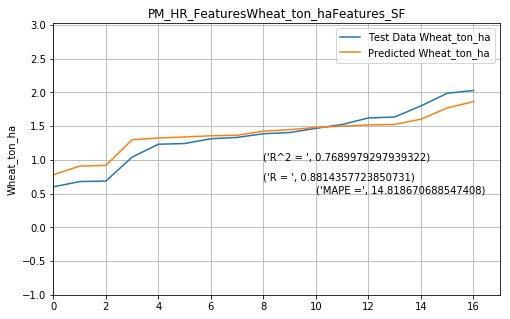

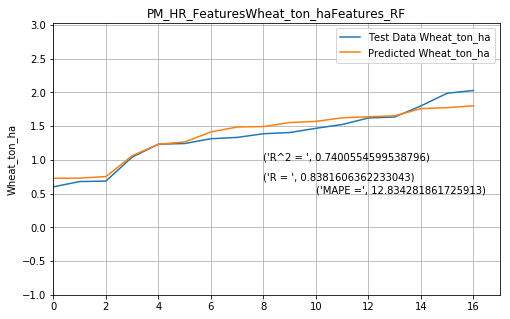

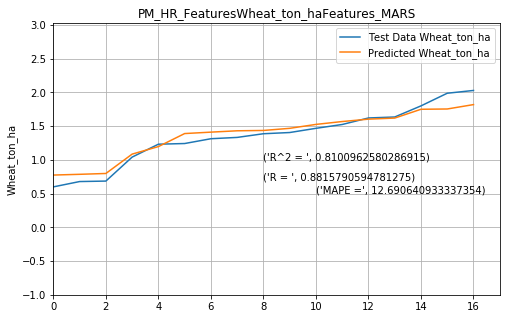

In [29]:

#run model
for j in features:
    RFR_PM_HR_Norm_model('Wheat_ton_ha', Features[j], Potohar_HR_Features)

C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Features_MARS
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.1812444699380219
R2 is: 0.8042131071148654
NS is 0.8042131071148654
Correlation is 0.8742839106329245
MAPE is 12.738540949578441


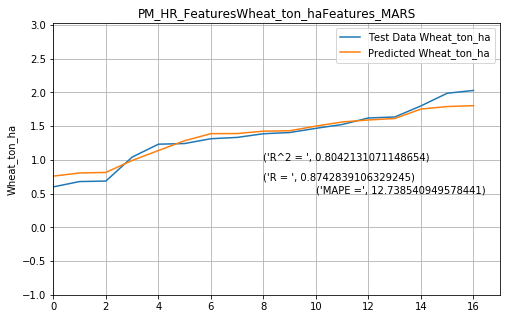

In [10]:
j='Features_MARS'
RFR_PM_HR_Norm_model('Wheat_ton_ha', Features['Features_MARS'], Potohar_HR_Features)